# US Visa Approval Prediction  


### About
The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on working place and maintain requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

# 1. Problem statement
- OFLC gives job certification applications for employers seeking to bring foreign workers into the United States and grants certifications.
- As In last year the count of employees were huge so OFLC needs Machine learning models to shortlist visa applicants based on their previous data.

**In this project we are going to use the data given to build a Classification model:**

- This model is to check if Visa get approved or not based on the given dataset.
- This can be used to Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the certain criteria which influences the decision.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px

%matplotlib inline


In [2]:
df = pd.read_csv("EasyVisa.csv")
display(df.head())
print("Dataframe shape:",df.shape)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


Dataframe shape: (25480, 12)


In [3]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


- `yr_of_estab` has min:1800 indicates outliers are present.
- `prevailing_wage` has min: 2.1367 indicates outliers are present.
- `no_of_employees` has max 602069 employees indicating presence of outliers.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [5]:
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

We have no missing values

### 3. Exploring the data

In [6]:
numeric_features = list(df.select_dtypes(include=[np.number]).columns)
categorical_features = list(df.select_dtypes(include=object).columns)
print(f"We have {len(numeric_features)} numeric_features:{numeric_features}")
print(f"We have {len(categorical_features)} categorical_features:{categorical_features}")

We have 3 numeric_features:['no_of_employees', 'yr_of_estab', 'prevailing_wage']
We have 9 categorical_features:['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


In [7]:
for feature in categorical_features:
    print(df[feature].value_counts(normalize=True)*100)
    print('---------------------------\n')


case_id
EZYV01       0.003925
EZYV02       0.003925
EZYV03       0.003925
EZYV04       0.003925
EZYV05       0.003925
               ...   
EZYV25476    0.003925
EZYV25477    0.003925
EZYV25478    0.003925
EZYV25479    0.003925
EZYV25480    0.003925
Name: proportion, Length: 25480, dtype: float64
---------------------------

continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64
---------------------------

education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64
---------------------------

has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64
---------------------------

requires_job_training
N    88.402669
Y    11.597331
Name: proportion, dtype: float64
---------------------------

region_of_employment
Northeast

- `case_id` has unique value for each column which can be dropped as its of no importance 
- `continent`: We have a lot of cases from `Asia` compared to other continents `Oceania` being least
-  `unit_of_wage`: yearly pay is considered 

#### Univariate analysis of numerical features

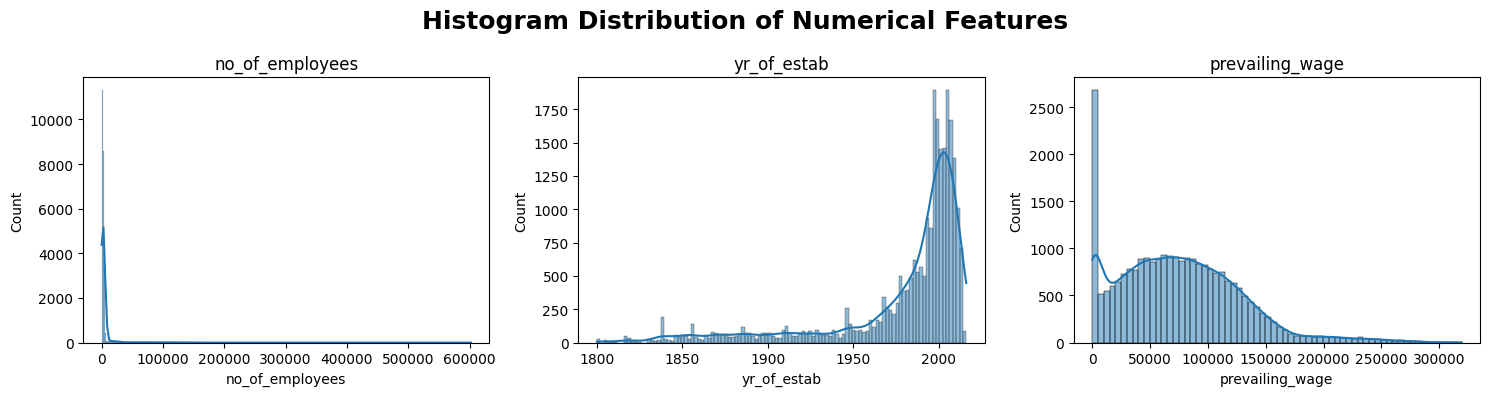

In [8]:
import math

n_cols = 3 
n_rows = math.ceil(len(numeric_features)/n_cols)

fig,axes = plt.subplots(n_rows,n_cols,figsize=(15,4*n_rows))
axes = axes.flatten()

for i,col in enumerate(numeric_features):
    sns.histplot(df[col],ax=axes[i],kde=True) 
    axes[i].set_title(col)

for j in range(i + 1,len(axes)):
    fig.delaxes(axes[j])

fig.suptitle(
    "Histogram Distribution of Numerical Features",
    fontsize=18,
    fontweight="bold"
)


plt.tight_layout()
plt.show()

- `no_of_employees` and `prevailing_wage` distribution is right skewed 
- `yr_of_estab` distribution is left skewed 

#### Univariate features of categorical features

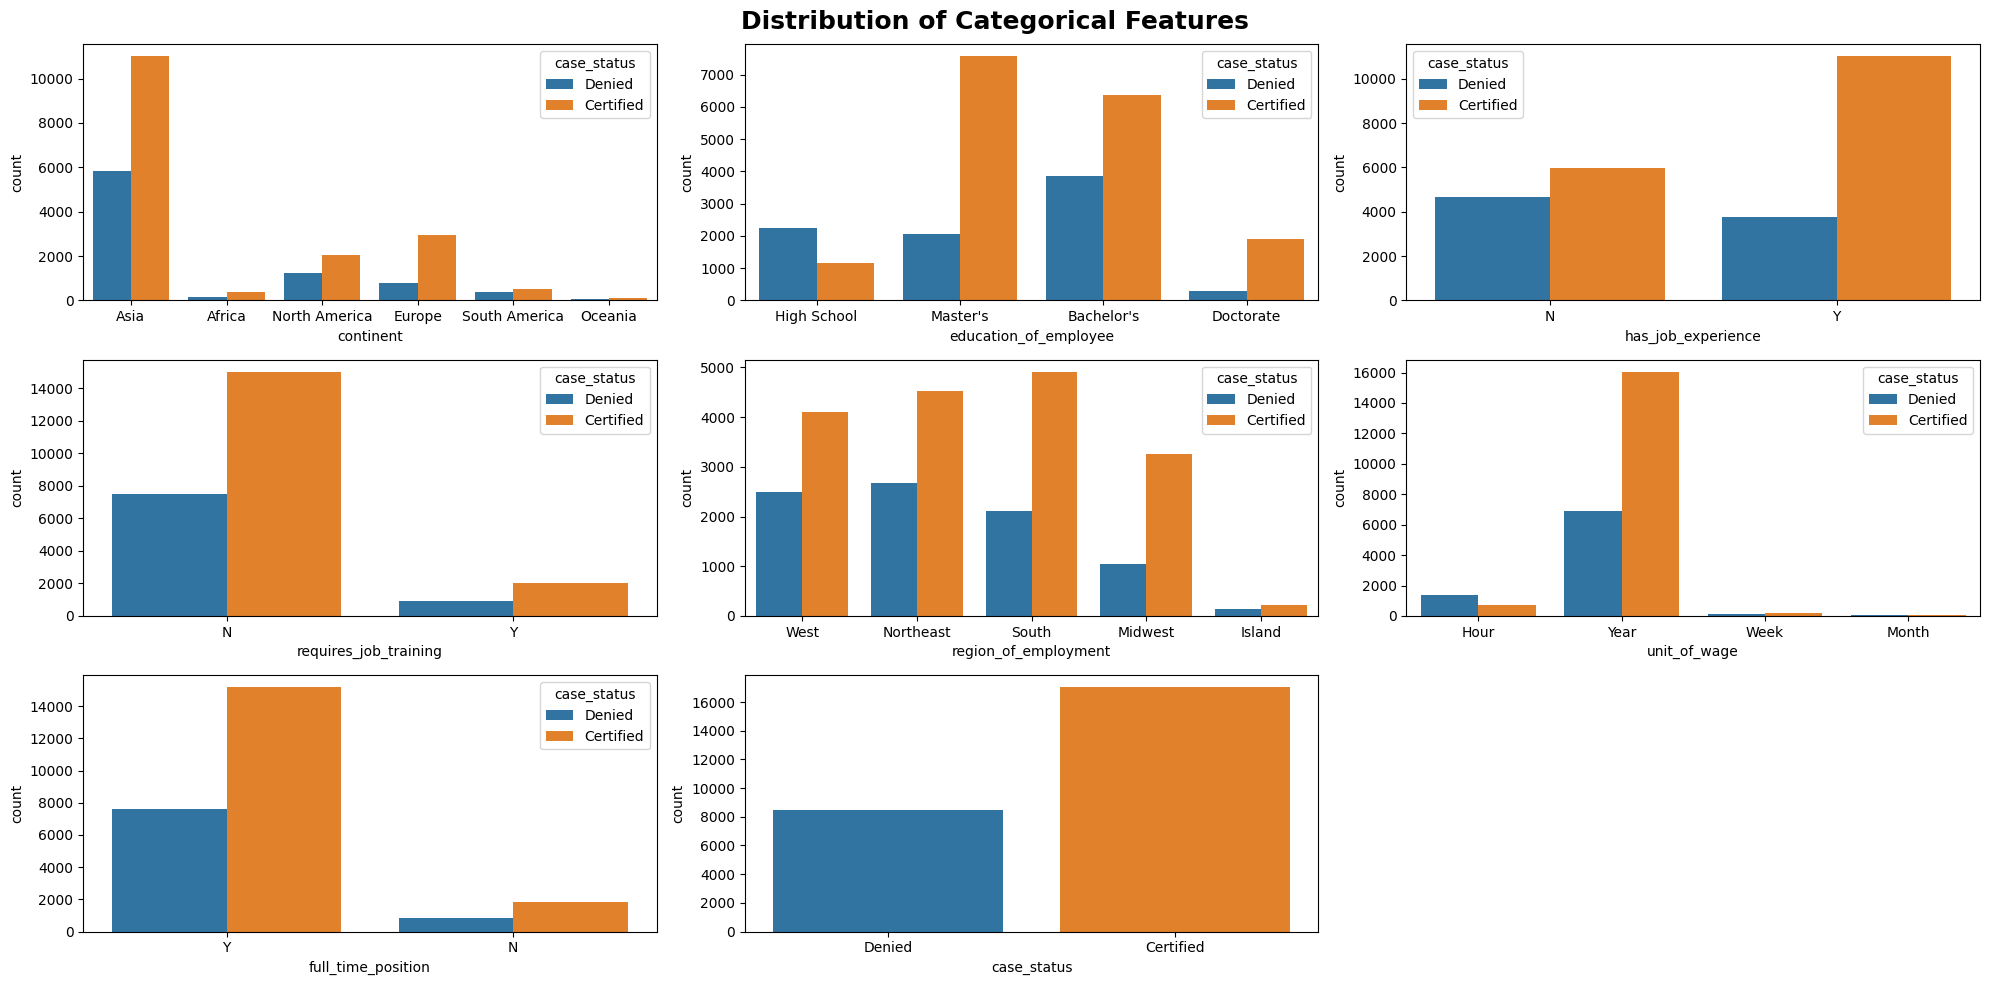

In [9]:
categorical_features = [
    'continent', 'education_of_employee', 'has_job_experience',
    'requires_job_training', 'region_of_employment',
    'unit_of_wage', 'full_time_position', 'case_status'
]

fig,axes = plt.subplots(3,3,figsize=(20,10))

axes = axes.flatten()

for i,col in enumerate(categorical_features):
    sns.countplot(data=df,
                  x=col,
                  ax=axes[i],
                  hue='case_status',
                  palette='tab10')
    axes[i].set_xlabel(col)

for j in range(i + 1,len(axes)):
    fig.delaxes(axes[j])

fig.suptitle(
    "Distribution of Categorical Features",
    fontsize=18,
    fontweight="bold"
)


plt.tight_layout()
plt.show()

- `requires_job_training`, `unit_of_wage`, `full_time_position` and `continents` columns have single `certified` category dominating.

### Multivariate Analysis 

In [10]:
discrete_features = [feature for feature in numeric_features if len(df[feature].unique()) <= 25]
continuous_features = [feature for feature in numeric_features if len(df[feature].unique()) > 25]
print("There are {} discrete features: {}".format(len(discrete_features),discrete_features))
print("There are {} continuous features: {}".format(len(continuous_features),continuous_features))

There are 0 discrete features: []
There are 3 continuous features: ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


### Check for multicollinearity in numeric features and categorical features 

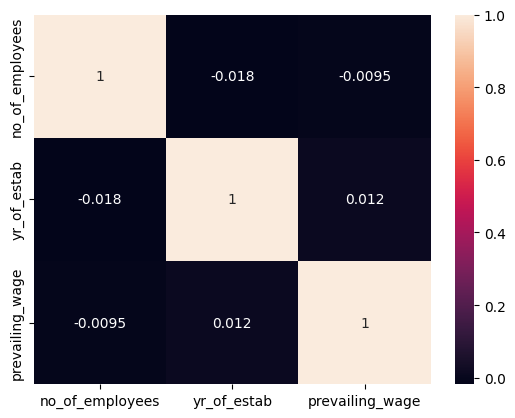

In [11]:
sns.heatmap(df[numeric_features].corr(),annot=True)
plt.show()

Multicollinearity doesnt exist between the features since they are not highly correlated.

### Check for multicollinearity between categorical features

- We will confirm this with chi-square test
- $Ho$ : The features are independent of target (`case_status`)
- $Ha$ : The features and target are not independent

In [12]:
from scipy.stats import chi2_contingency

chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['case_status'],df[feature]))[1] < 0.05:
        chi2_test.append("Reject Null Hypothesis")
    else:
        chi2_test.append("Fail to Reject Null Hypothesis")

result = pd.DataFrame(data=[categorical_features,chi2_test]).T
result.columns = ["Column","Hypothesis Result"]
result

,Column,Hypothesis Result
0,continent,Reject Null Hypothesis
1,education_of_employee,Reject Null Hypothesis
2,has_job_experience,Reject Null Hypothesis
3,requires_job_training,Fail to Reject Null Hypothesis
4,region_of_employment,Reject Null Hypothesis
5,unit_of_wage,Reject Null Hypothesis
6,full_time_position,Reject Null Hypothesis
7,case_status,Reject Null Hypothesis


`requires_job_training` fails to reject $Ho$ it doesnt correlate with `case_status`

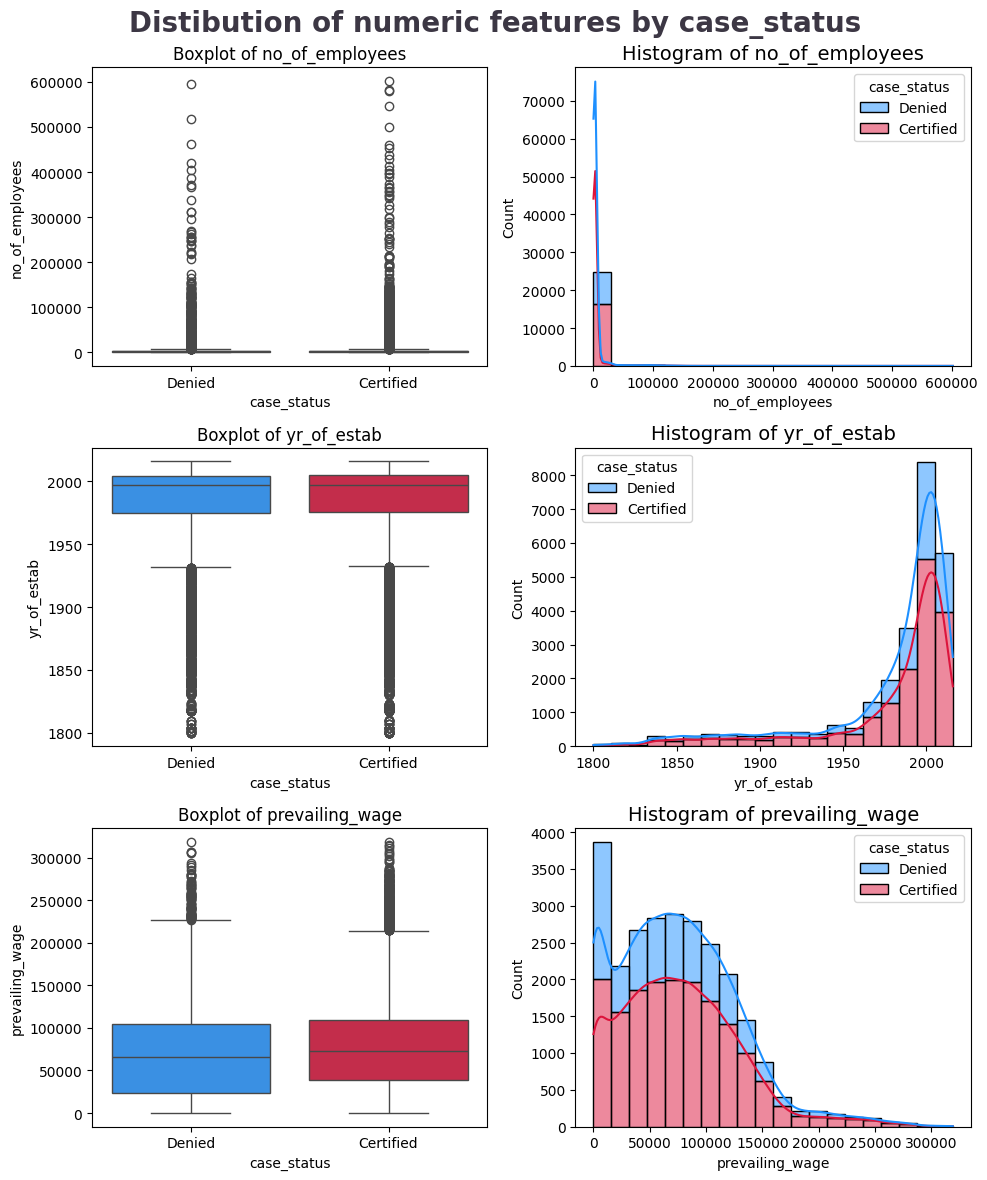

In [13]:
clr1 = ['#1E90FF', '#DC143C']

fig,ax = plt.subplots(3,2,figsize=(10,12))
fig.suptitle("Distibution of numeric features by case_status",color='#3C3744',
             fontsize=20, fontweight='bold', ha='center')

for i,col in enumerate(continuous_features):
    sns.boxplot(data=df,
                x='case_status',
                y=col,
                palette=clr1,
                hue='case_status',
                ax=ax[i,0])
    
    ax[i,0].set_title(f"Boxplot of {col}",fontsize=12)
    
    sns.histplot(data=df,
                 x=col,
                 hue='case_status',
                 bins=20,
                 kde=True,
                 multiple='stack',
                 palette=clr1,
                 ax=ax[i,1])
    ax[i,1].set_title(f"Histogram of {col}",fontsize=14)

fig.tight_layout()
plt.show()


We can identify a lot of outliers in all the categorical features and also we can see the distributions are skewed as they are long tailed. 

### Visualization

#### Visualize the target features

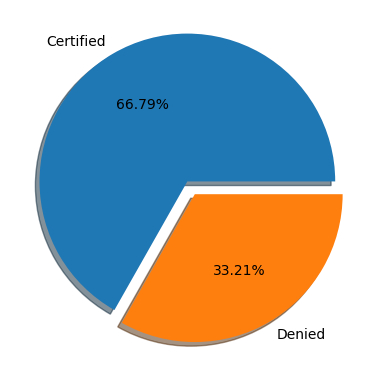

In [14]:
plt.pie(df['case_status'].value_counts(normalize=True)*100,
        explode=(0.1,0),
        labels=["Certified","Denied"],
        shadow=True,
        autopct="%1.2f%%")
plt.show()

`case_status` is imbalanced

### Does `continent` have impact on `case_status`

In [15]:
continent_case_status = df.groupby('continent')['case_status']
continent_case_status_pct_df = continent_case_status.value_counts(normalize=True).to_frame()*100
continent_case_status_pct_df

proportion
continent     case_status            
Africa        Certified     72.050817
              Denied        27.949183
Asia          Certified     65.310480
              Denied        34.689520
Europe        Certified     79.233655
              Denied        20.766345
North America Certified     61.877278
              Denied        38.122722
Oceania       Certified     63.541667
              Denied        36.458333
South America Certified     57.863850
              Denied        42.136150

In [16]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


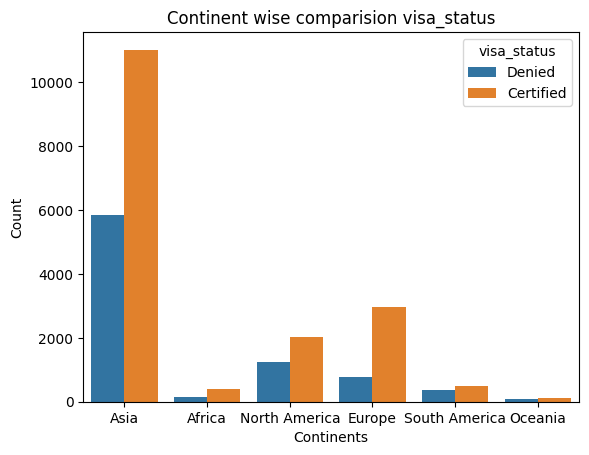

In [17]:
sns.countplot(data=df,x='continent',palette='tab10',hue='case_status')
plt.title("Continent wise comparision visa_status")
plt.xlabel("Continents")
plt.ylabel("Count")
plt.legend(title='visa_status')
plt.show()


In [18]:
# Unstack and clean columns
certified_pct_by_continent = (
    continent_case_status_pct_df
    .unstack(level='case_status')
)

# Drop the top column level ('proportion')
certified_pct_by_continent.columns = (
    certified_pct_by_continent.columns.droplevel(0)
)

# Keep only Certified and sort
certified_pct_by_continent = (
    certified_pct_by_continent[['Certified']]
    .sort_values(by='Certified', ascending=False)
)

certified_pct_by_continent.head()


case_status,Certified
continent,
Europe,79.233655
Africa,72.050817
Asia,65.310480
Oceania,63.541667
North America,61.877278


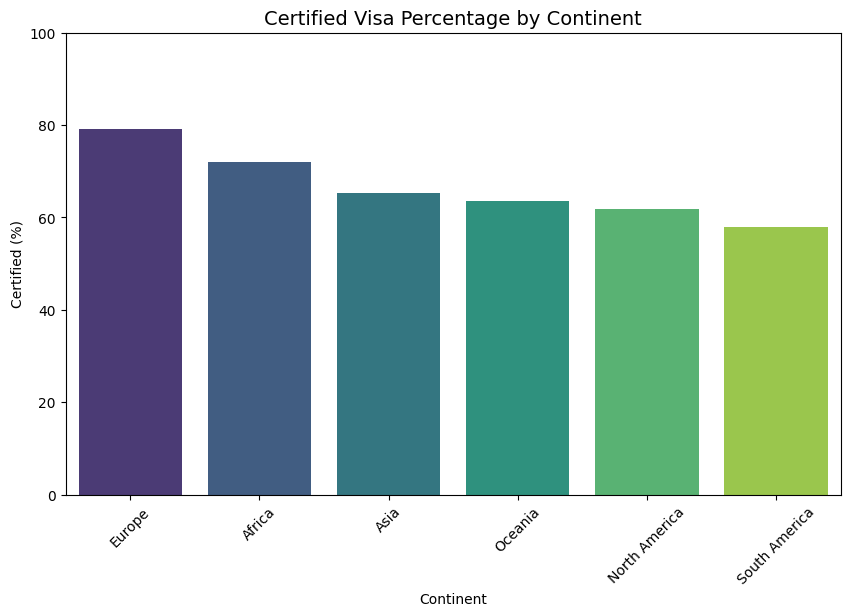

In [19]:
plt.figure(figsize=(10,6))

sns.barplot(
    data=certified_pct_by_continent.reset_index(),
    x='continent',
    y='Certified',
    palette='viridis',
    hue='continent'
)

plt.title('Certified Visa Percentage by Continent', fontsize=14)
plt.xlabel('Continent')
plt.ylabel('Certified (%)')
plt.xticks(rotation=45)
plt.ylim(0, 100)

plt.show()


Highest certified rate comes from `Europe` and `Africa` and followed by `Asia`

### Exploring the relationship `education_of_employee` and `case_status`

In [20]:
education_case_status_pct_df = df.groupby("education_of_employee")['case_status'].value_counts(normalize=True).to_frame()*100
education_case_status_pct_df

proportion
education_of_employee case_status            
Bachelor's            Certified     62.214188
                      Denied        37.785812
Doctorate             Certified     87.226277
                      Denied        12.773723
High School           Denied        65.964912
                      Certified     34.035088
Master's              Certified     78.627777
                      Denied        21.372223

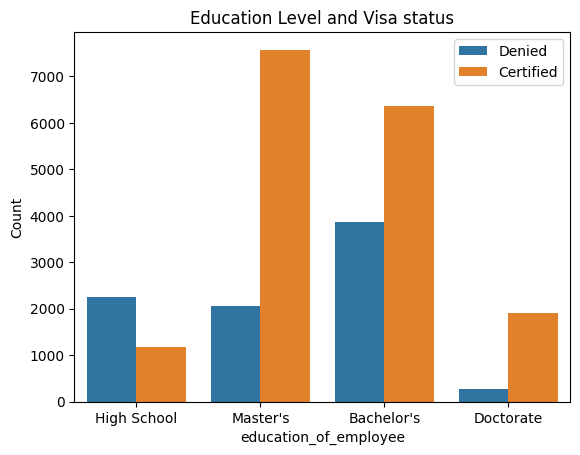

In [21]:
sns.countplot(data=df,x='education_of_employee',hue='case_status',palette='tab10')
plt.title("Education Level and Visa status")
plt.xlabel("education_of_employee")
plt.ylabel("Count")
plt.legend()
plt.show()


In [22]:
# Unstack and clean columns
education_case_status_pct_df = (
    education_case_status_pct_df
    .unstack(level='case_status')
)

# Drop the top column level ('proportion')
education_case_status_pct_df.columns = (
    education_case_status_pct_df.columns.droplevel(0)
)

# Keep only Certified and sort
education_case_status_pct_df = (
    education_case_status_pct_df[['Certified']]
    .sort_values(by='Certified', ascending=False)
)

education_case_status_pct_df.head()


case_status,Certified
education_of_employee,
Doctorate,87.226277
Master's,78.627777
Bachelor's,62.214188
High School,34.035088


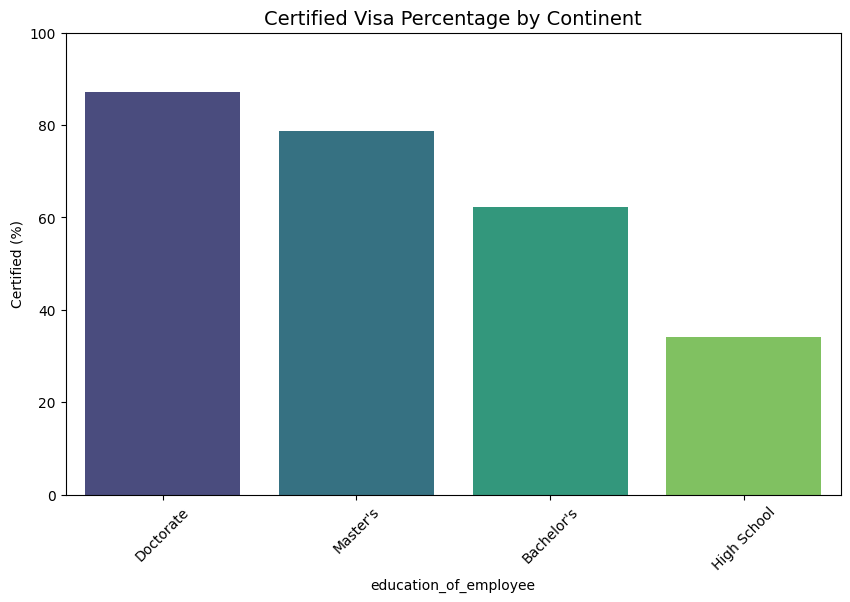

In [23]:
plt.figure(figsize=(10,6))

sns.barplot(
    data=education_case_status_pct_df.reset_index(),
    x='education_of_employee',
    y='Certified',
    palette='viridis',
    hue='education_of_employee'
)

plt.title('Certified Visa Percentage by Continent', fontsize=14)
plt.xlabel('education_of_employee')
plt.ylabel('Certified (%)')
plt.xticks(rotation=45)
plt.ylim(0, 100)

plt.show()


- `education_of_employees` has a high impace `case_status`
- `Doctorate` and `Master's` candidates have higher chance of being `certified` 

### Exploring the relationship between `has_job_experience` and `case_status`

In [24]:
work_exp_status_pct_df = df.groupby("has_job_experience")['case_status'].value_counts(normalize=True).to_frame()*100
work_exp_status_pct_df

proportion
has_job_experience case_status            
N                  Certified     56.134108
                   Denied        43.865892
Y                  Certified     74.476422
                   Denied        25.523578

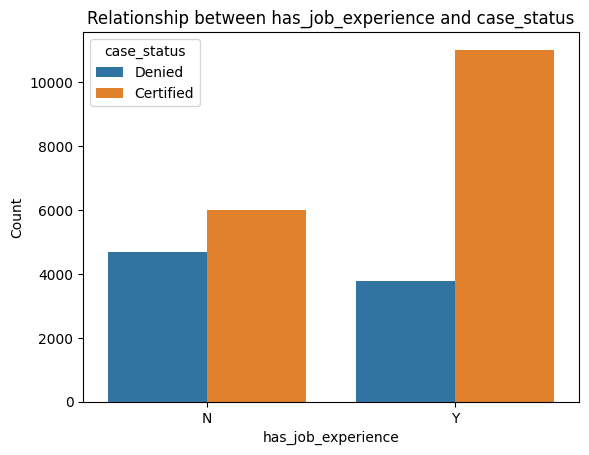

In [25]:
sns.countplot(data=df,x='has_job_experience',hue='case_status',palette='tab10')
plt.xlabel("has_job_experience")
plt.ylabel("Count")
plt.title("Relationship between has_job_experience and case_status")
plt.show()

In [26]:
work_exp_status_pct_df = work_exp_status_pct_df.unstack(level='case_status')
work_exp_status_pct_df.columns = work_exp_status_pct_df.columns.droplevel(0)

In [27]:
work_exp_status_pct_df = work_exp_status_pct_df[['Certified']].sort_values(by="Certified",ascending=False)
work_exp_status_pct_df

case_status,Certified
has_job_experience,
Y,74.476422
N,56.134108


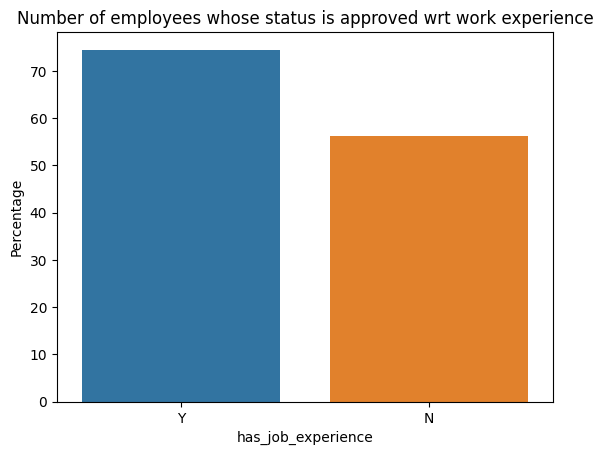

In [34]:
sns.barplot(data=work_exp_status_pct_df.reset_index(),
            x='has_job_experience',
            y='Certified',
            hue='has_job_experience',
            palette='tab10')
plt.xlabel("has_job_experience")
plt.ylabel("Percentage")
plt.title("Number of employees whose status is approved wrt work experience")
plt.show()

- Around 75% of applicants get approved with work experience 
- Around 55 % of applicants without work experience get approved